In [25]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
from agent import AgentTypes as BT

def ranks_eval(ranks, save=False, path="", title="Density over ranks"):
    ranks, counts = np.unique(ranks, return_counts=True)
    counts = counts / np.sum(counts)
    ranks = ranks + 1

    fig, ax1 = plt.subplots()

    color = 'tab:green'
    ax1.set_xlabel('Rank of action')
    ax1.set_ylabel('Portion of agents')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.bar(ranks, counts, color=color)
    ax1.title.set_text(title)
    ax1.set_ylim([0, 1])

    if save:
        plt.savefig(path)
        plt.close(fig)
    else:
        plt.show()

    
    
def trace_eval(traces, labels, save=False, path="", title="Accuracy over time"):
    ts = np.arange(1, traces[0].size + 1)
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('t')
    ax1.set_ylabel('Accuracy')
    ax1.title.set_text(title)
    ax1.set_ylim([0, 1])
    
    for trace, label in zip(traces, labels):
        ax1.plot(ts, trace, label=label)

    ax1.legend()

    if save:
        plt.savefig(path)
        plt.close(fig)
    else:
        plt.show()

def reward_eval(rewards, env, labels, save=False, path="", title="Reward over time"):
    ts = np.arange(1, rewards[0].size + 1)
    
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('t')
    ax1.set_ylabel('Reward')
    ax1.title.set_text(title)
    if env == "G":
        ax1.set_ylim([0, 4])
    elif env == "B":
        ax1.set_ylim([0, 1])
    
    for trace, label in zip(rewards, labels):
        ax1.plot(ts, trace, label=label)
    
    ax1.legend()

    if save:
        plt.savefig(path)
        plt.close(fig)
    else:
        plt.show()


t=99.8003992015968


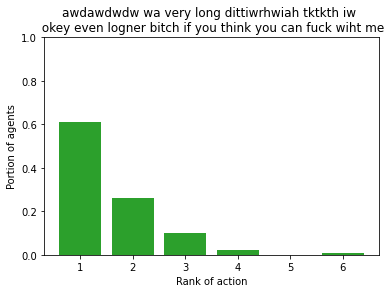

In [24]:
method = BT.GREEDY
env = "G"
ranks, trace, reward = gym.gains(method, env, k=10, N=100, T=500)
ranks_eval(ranks, title="awdawdwdw wa very long dittiwrhwiah tktkth iw \n okey even logner bitch if you think you can fuck wiht me")


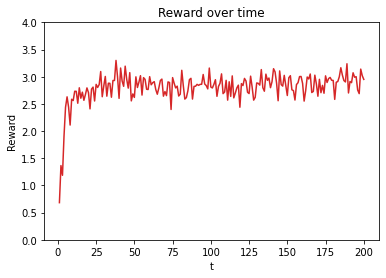

In [15]:
method = BT.OPTIMISTIC
env = "G"
qScales = 3
ranks, trace, reward = gym.gains(method, env, k=10, N=100, T=200, extra=qScales)
reward_eval(reward, env)

In [28]:
envs = ["Gaussian", "Bernoulli"]

groups = [
    [BT.GREEDY, BT.OPTIMISTIC],
    [BT.OPTIMISTIC, BT.UCB],
    [BT.AP, BT.SOFT_MAX, BT.SOFT_MAX_Q_VALUES]
]

k = 10
N = 1000
T = 500

qScales = 3
epsilon = 0.1

def generate_graphs():
    for method in BT:
        name = str(method).split(".")[1].lower()
        extra = None

        if method == BT.OPTIMISTIC:
            extra = qScales

        if method == BT.EPSILON_GREEDY:
            extra = epsilon

        for envName in envs:
            env = envName[0]
            ranks, trace, reward = gym.gains(method, env, k=k, N=N, T=T, extra=extra)
            trace_eval(
                trace, 
                save=True, 
                path=f"./graphs/{name}_{env}_trace.png",
                title=f"Accuracy over time \nfor {name} in {envName} environment"  
            )
            ranks_eval(
                ranks, 
                save=True, 
                path=f"./graphs/{name}_{env}_ranks.png",
                title=f"Portion of agents over action rank \nfor {name} in {envName} environment"  
            )
            reward_eval(
                reward, 
                save=True, 
                path=f"./graphs/{name}_{env}_reward.png",
                title=f"Average reward of agents over time \nfor {name} in {envName} environment"  
            )

            
def generate_graphs_groups(groups):
    for group in groups:
        

        for envName in envs:
            env = envName[0]
            names = ""
            traces = []
            rewards = []
            
            for method in group:
                name = str(method).split(".")[1].lower()
                names += f"{name}-"
                extra = None

                if method == BT.OPTIMISTIC:
                    extra = qScales

                if method == BT.EPSILON_GREEDY:
                    extra = epsilon
                
                _, trace, reward = gym.gains(method, env, k=k, N=N, T=T, extra=extra)
                traces.append(trace)
                rewards.append(reward)

            names = names[:-1]
            labels = names.split("-")

            trace_eval(
                traces,
                labels,
                save=True, 
                path=f"./graphs/{names}_{env}_trace.png",
                title=f"Accuracy over time in {envName} environment"  
            )
            reward_eval(
                rewards,
                env,
                labels,
                save=True, 
                path=f"./graphs/{names}_{env}_reward.png",
                title=f"Average reward of agents in {envName} environment"  
            )

generate_graphs_groups(groups)

In [9]:
str(BT.GREEDY)

'BanditTypes.GREEDY'